In [7]:
### IMPORTS AND READ CSV
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

# Initialise dataframe with headers
col_names = ["elevation", "aspect", "slope", "horizontaltohydro", "verticaltohydro", "horizontaltoroadway", "hillshade9am", "hillshadenoon", "hillshade3pm", "horizontaltofirepoints", "wildernessareaRawah", "wildernessareaNeota", "wildernessareaComanche", "wildernessareaCache", "soil1", "soi2", "soil3", "soil4", "soil5", "soil6", "soil7", "soil8", "soil9", "soil10", "soil11", "soil12", "soil13", "soil14", "soil15", "soil16", "soil17", "soil18", "soil19", "soil20", "soil21", "soil22", "soil23", "soil24", "soil25", "soil26", "soil27", "soil28", "soil29", "soil30", "soil31", "soil32", "soil33", "soil34", "soil35", "soil36", "soil37", "soil38", "soil39", "soil40", "target"]
cover_data = pd.read_csv('covtype.data', sep=',', names=col_names)

X1 = cover_data.dropna()
X = X1.drop(columns=["target"])
Y = X1["target"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [5]:
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import cross_val_score, KFold 
# from sklearn.metrics import accuracy_score

# # before cross-validation
# # clf = RandomForestClassifier(n_estimators=20)
# clf = KNeighborsClassifier(n_neighbors=5, n_jobs=10)
# clf.fit(X_train, Y_train)
# Y_pred = clf.predict(X_test)
# print("accuracy before cross validation: " + str(accuracy_score(Y_test, Y_pred)))

# # cross-validation
# acc_scores = []
# k = 5
# kf = KFold(n_splits=k, random_state=None)
# for train_index , test_index in kf.split(X):
#     X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
#     Y_train , Y_test = Y[train_index] , Y[test_index]

#     clf.fit(X_train, Y_train)
#     Y_pred = clf.predict(X_test)

#     acc = accuracy_score(Y_test , Y_pred)
#     print("    " + str(acc))
#     acc_scores.append(acc)

# # show average accuracy
# avg_acc_score = sum(acc_scores)/k
# print("average:" + str(avg_acc_score))

# # print(confusion_matrix(Y_test,Y_pred))
# # print(classification_report(Y_test,Y_pred))
# # print(accuracy_score(Y_test, Y_pred))


In [6]:
### compare models before and after Cross Validation
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

## Random Forest
from sklearn.ensemble import RandomForestClassifier
RFaccuracy_scores = []
RF = RandomForestClassifier()
# clf = KNeighborsClassifier(n_neighbors=5)
RF.fit(X_train, Y_train)
Y_pred = RF.predict(X_test)
RFaccuracy_scores.append(accuracy_score(Y_test, Y_pred))

scores = cross_val_score(RF, X, Y, cv=5)
RFaccuracy_scores.append(scores.mean()*100)

# kNN
from sklearn.neighbors import KNeighborsClassifier
kNNaccuracy_scores = []
kNN = KNeighborsClassifier(n_neighbors=5)
kNN.fit(X_train, Y_train)
Y_pred = kNN.predict(X_test)
kNNaccuracy_scores.append(accuracy_score(Y_test, Y_pred))

scores = cross_val_score(kNN, X, Y, cv=5)
kNNaccuracy_scores.append(scores.mean()*100)

# SGD
from sklearn.linear_model import SGDClassifier
SGDaccuracy_scores = []
SGD = SGDClassifier(n_neighbors=5)
SGD.fit(X_train, Y_train)
Y_pred = SGD.predict(X_test)
SGDaccuracy_scores.append(accuracy_score(Y_test, Y_pred))

scores = cross_val_score(SGD, X, Y, cv=5)
SGDaccuracy_scores.append(scores.mean()*100)

plt.figure(figsize=(24, 16))
plt.plot(["Before", "After"], RFaccuracy_scores, color='red', linestyle='dashed', marker='.',
         markerfacecolor='blue', markersize=10, label='RandomForest')
plt.plot(["Before", "After"], kNNaccuracy_scores, color='green', linestyle='dashed', marker='.',
         markerfacecolor='blue', markersize=10, label='kNN')  
plt.plot(["Before", "After"], SGDaccuracy_scores, color='blue', linestyle='dashed', marker='.',
         markerfacecolor='blue', markersize=10, label='SGD')    
plt.title('Accuracy before and after Cross Validation')
plt.xlabel('Before/After Cross Validation')
plt.ylabel('Accuracy Score')

plt.legend()
plt.show()

# # manual cross-validation
# acc_scores = []
# k = 5
# kf = KFold(n_splits=k, random_state=None)
# for train_index , test_index in kf.split(X):
#     X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
#     Y_train , Y_test = Y[train_index] , Y[test_index]

#     clf.fit(X_train, Y_train)
#     Y_pred = clf.predict(X_test)

#     acc = accuracy_score(Y_test , Y_pred)
#     print("    " + str(acc))
#     acc_scores.append(acc)

# # show average accuracy
# avg_acc_score = sum(acc_scores)/k
# print("average:" + str(avg_acc_score))

KeyboardInterrupt: 

In [ ]:
print(RFaccuracy_scores)
print(kNNaccuracy_scores)
print(SGDaccuracy_scores)


[95.51732743560838, 59.56882144244514]


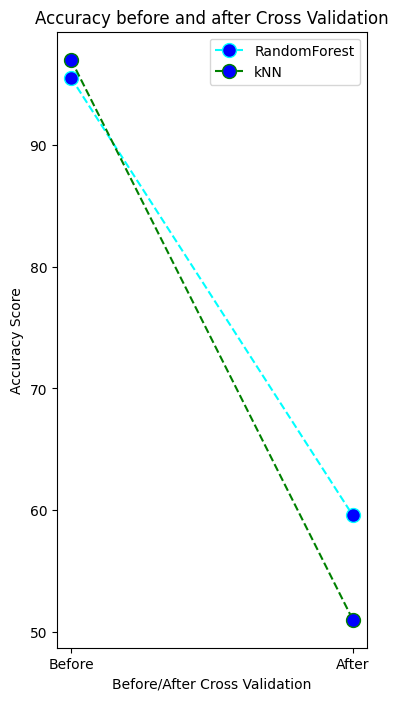

In [ ]:
# plt.figure(figsize=(4, 8))
# plt.plot(["Before", "After"], accuracy_scores, color='cyan', linestyle='dashed', marker='o',
#          markerfacecolor='blue', markersize=10, label='RandomForest')
# plt.plot(["Before", "After"], [97, 51], color='green', linestyle='dashed', marker='o',
#          markerfacecolor='blue', markersize=10, label='kNN')   
# plt.title('Accuracy before and after Cross Validation')
# plt.xlabel('Before/After Cross Validation')
# plt.ylabel('Accuracy Score')

# plt.legend()
# plt.show()

In [ ]:
# # Parameter tuning
# from sklearn.model_selection import GridSearchCV
# from sklearn.neighbors import KNeighborsClassifier

# leaf_size = list(range(1,10))
# n_neighbors = list(range(1,10))
# p=[1,2]

# # Create new KNN object
# kNN2 = KNeighborsClassifier()

# # List Hyperparameters that we want to tune.
# params = {
#     "leaf_size": list(range(1,10)),
#     "n_neighbors": list(range(1,10)),
#     "p": [1,2]
# }

# # Use GridSearch
# gs = GridSearchCV(estimator=kNN2, param_grid=params, cv=3, verbose=2, n_jobs=3)
# best_model = gs.fit(X_train, Y_train)

# # Print The value of best Hyperparameters
# print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
# print('Best p:', best_model.best_estimator_.get_params()['p'])
# print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

In [ ]:
# ## Logitsics Regression
# # Train and Predict
# from sklearn.linear_model import LogisticRegression

# lr = LogisticRegression(penalty="none", max_iter=2000, n_jobs=12)
# lr.fit(X_train, Y_train)

# Y_pred = lr.predict(X_test)
# print(confusion_matrix(Y_test, Y_pred))
# print(classification_report(Y_test, Y_pred))
# print(accuracy_score(Y_test, Y_pred))